In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Model Comparisons
This report will show the model performance for the experimental models and the final production model.

In [2]:
__author__ = "John Hoff"
__email__ = "john.hoff@braindonor.net"
__copyright__ = "Copyright 2019, John Hoff"
__license__ = "Creative Commons Attribution-ShareAlike 4.0 International License"
__version__ = "1.0.0"

import os
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
    
from IPython.display import display, Markdown

import itertools
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import auc, accuracy_score, classification_report, confusion_matrix, log_loss, roc_curve

In [3]:
def custom_classification_report(title, predict_file, predict_proba_file):
    """
    Display a classification report for the performance of the predicted values.
    :param title: Title to display for the report.
    :param predict_file: File Containing Class Predictions
    :param predict_proba_file: File Containing Class Prediction Probabilities
    :return: 
    """
    display(Markdown('## %s' % title))
    with open(predict_file, 'rb') as file:
        frame = pickle.load(file)
        y_test = frame.y_actual
        y_test_predict = frame.y_predict
        display(Markdown('#### Confusion Matrix'))
        matrix = confusion_matrix(y_test, y_test_predict)

        plt.figure(figsize=(12,12))
        plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

        color_mid = matrix.max() / 2.
        for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
            plt.text(j, i, matrix[i, j], fontsize=10,
                     horizontalalignment="center",
                     verticalalignment='center',
                     color="white" if matrix[i, j] > color_mid else "black")

        ticks = np.arange(len(np.unique(y_test)))
        classes = np.unique(y_test)
        plt.xticks(ticks, classes)
        plt.yticks(ticks, classes)
        plt.ylabel('True Class', fontsize=20, rotation=90)
        plt.xlabel('Predicted Class', fontsize=20)
        plt.show()

        display(Markdown('#### scikit-learn classification_report'))
        print(classification_report(y_test, y_test_predict))
        
        display(Markdown('#### Accuracy Score'))
        print('%f' % accuracy_score(y_test, y_test_predict))
        
    with open(predict_proba_file, 'rb') as file:
        frame = pickle.load(file)
        display(Markdown('#### Log Loss Score'))
        print('%f' % log_loss(frame.y_actual, frame.y_predict))
        
        display(Markdown('#### ROC Curves for All Classes'))
        plt.figure(figsize=(10,10))
        for class_number in np.unique(frame.y_actual):
            y_converted = []
            for y in frame.y_actual:
                if y == class_number:
                    y_converted.append(1)
                else:
                    y_converted.append(0)
            fpr, tpr, threshold = roc_curve(y_converted, frame.y_predict[:,1])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label='%0.3f AUC - Class %s' % (roc_auc, int(class_number)))
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'k--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

# Experimental Model Performance

## Bernoulli Naive Bayes

#### Confusion Matrix

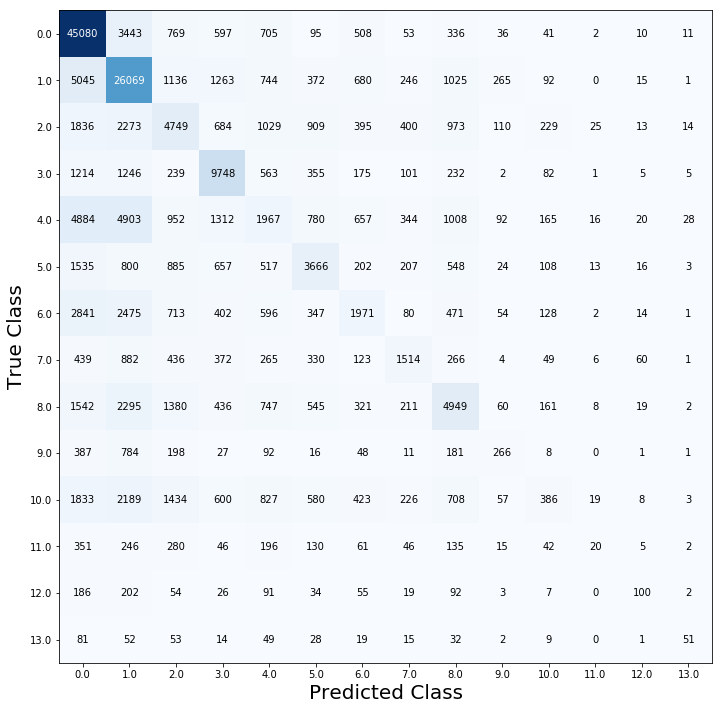

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.67      0.87      0.76     51686
         1.0       0.54      0.71      0.61     36953
         2.0       0.36      0.35      0.35     13639
         3.0       0.60      0.70      0.65     13968
         4.0       0.23      0.11      0.15     17128
         5.0       0.45      0.40      0.42      9181
         6.0       0.35      0.20      0.25     10095
         7.0       0.44      0.32      0.37      4747
         8.0       0.45      0.39      0.42     12676
         9.0       0.27      0.13      0.18      2020
        10.0       0.26      0.04      0.07      9293
        11.0       0.18      0.01      0.02      1575
        12.0       0.35      0.11      0.17       871
        13.0       0.41      0.13      0.19       406

   micro avg       0.55      0.55      0.55    184238
   macro avg       0.40      0.32      0.33    184238
weighted avg       0.49      0.55      0.51    184238



#### Accuracy Score

0.545685


#### Log Loss Score

1.471855


#### ROC Curves for All Classes

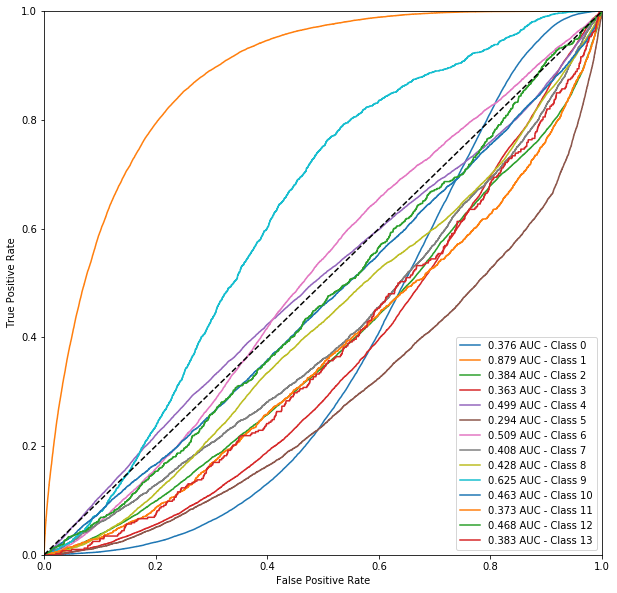

In [4]:
custom_classification_report(
    'Bernoulli Naive Bayes',
    'model/experiment/output/bernoulli_naive_bayes_basic_predict.p',
    'model/experiment/output/bernoulli_naive_bayes_basic_predict_proba.p'
)

## Complement Naive Bayes

#### Confusion Matrix

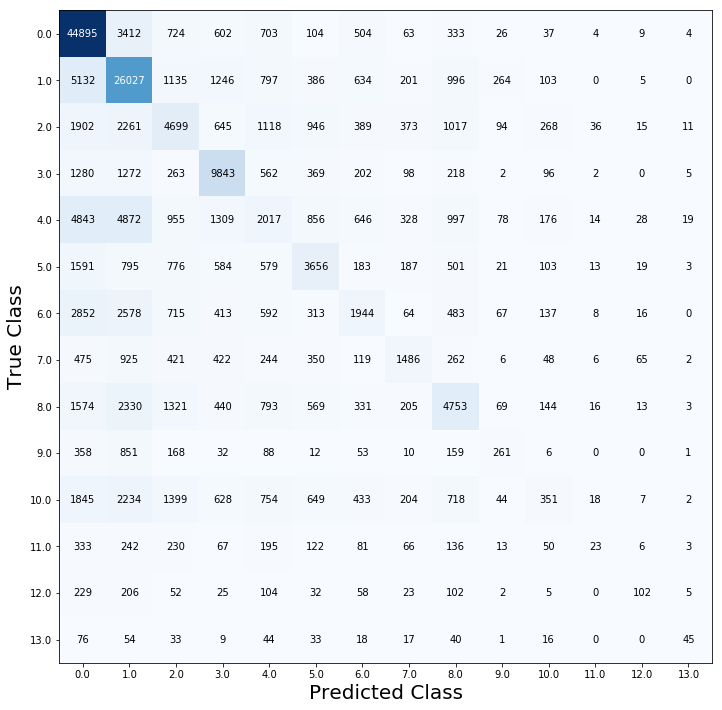

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.67      0.87      0.76     51420
         1.0       0.54      0.70      0.61     36926
         2.0       0.36      0.34      0.35     13774
         3.0       0.61      0.69      0.65     14212
         4.0       0.23      0.12      0.16     17138
         5.0       0.44      0.41      0.42      9011
         6.0       0.35      0.19      0.25     10182
         7.0       0.45      0.31      0.36      4831
         8.0       0.44      0.38      0.41     12561
         9.0       0.28      0.13      0.18      1999
        10.0       0.23      0.04      0.06      9286
        11.0       0.16      0.01      0.03      1567
        12.0       0.36      0.11      0.17       945
        13.0       0.44      0.12      0.18       386

   micro avg       0.54      0.54      0.54    184238
   macro avg       0.40      0.32      0.33    184238
weighted avg       0.49      0.54      0.50    184238



#### Accuracy Score

0.543330


#### Log Loss Score

1.476054


#### ROC Curves for All Classes

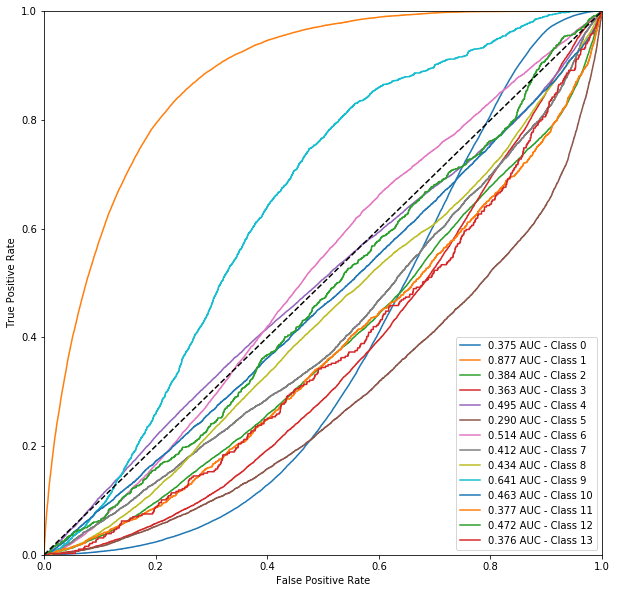

In [5]:
custom_classification_report(
    'Complement Naive Bayes',
    'model/experiment/output/complement_naive_bayes_basic_predict.p',
    'model/experiment/output/complement_naive_bayes_basic_predict_proba.p'
)

## Decision Tree

#### Confusion Matrix

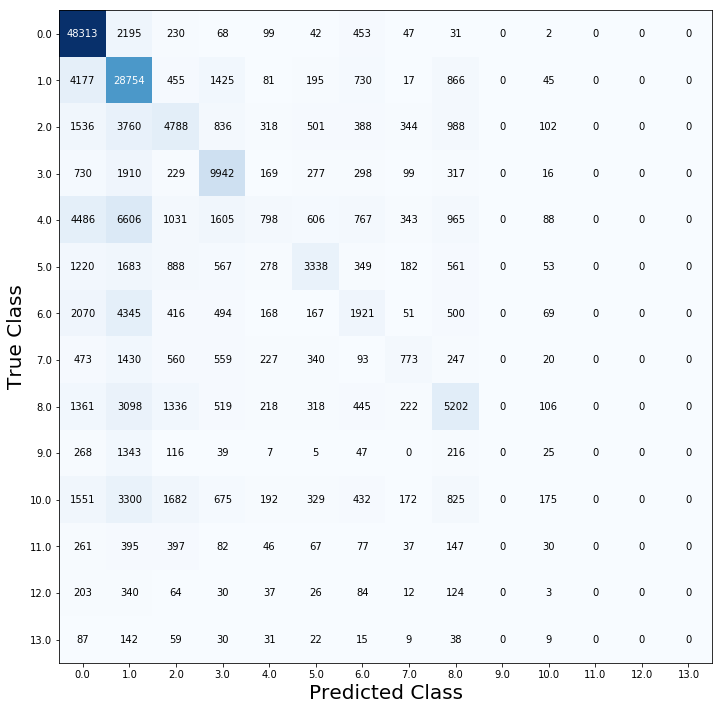

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.72      0.94      0.82     51480
         1.0       0.48      0.78      0.60     36745
         2.0       0.39      0.35      0.37     13561
         3.0       0.59      0.71      0.64     13987
         4.0       0.30      0.05      0.08     17295
         5.0       0.54      0.37      0.43      9119
         6.0       0.31      0.19      0.24     10201
         7.0       0.33      0.16      0.22      4722
         8.0       0.47      0.41      0.44     12825
         9.0       0.00      0.00      0.00      2066
        10.0       0.24      0.02      0.03      9333
        11.0       0.00      0.00      0.00      1539
        12.0       0.00      0.00      0.00       923
        13.0       0.00      0.00      0.00       442

   micro avg       0.56      0.56      0.56    184238
   macro avg       0.31      0.28      0.28    184238
weighted avg       0.50      0.56      0.50    184238



c:\repos\depaul\la-parking-tickets\venv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Accuracy Score

0.564509


#### Log Loss Score

1.453071


#### ROC Curves for All Classes

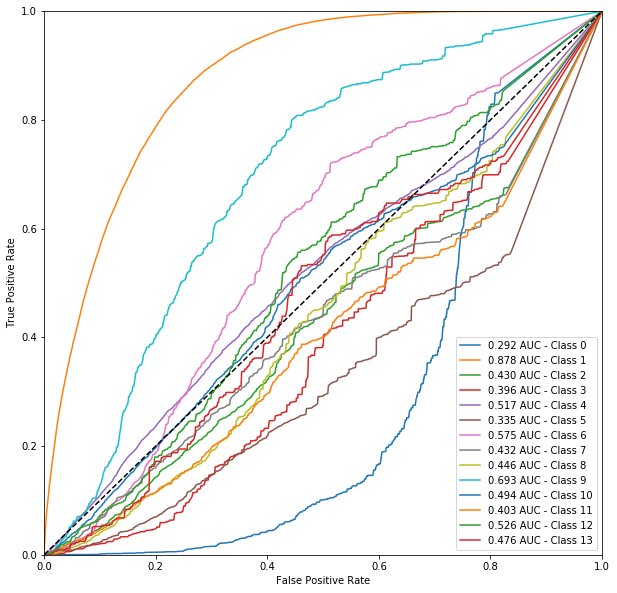

In [6]:
custom_classification_report(
    'Decision Tree',
    'model/experiment/output/decision_tree_basic_predict.p',
    'model/experiment/output/decision_tree_basic_predict_proba.p'
)

## Extra Trees

#### Confusion Matrix

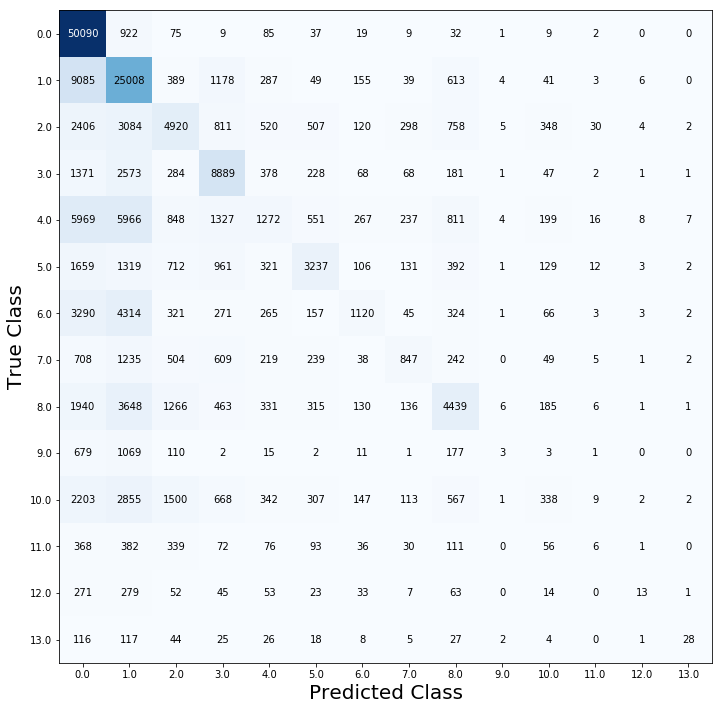

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.62      0.98      0.76     51290
         1.0       0.47      0.68      0.56     36857
         2.0       0.43      0.36      0.39     13813
         3.0       0.58      0.63      0.60     14092
         4.0       0.30      0.07      0.12     17482
         5.0       0.56      0.36      0.44      8985
         6.0       0.50      0.11      0.18     10182
         7.0       0.43      0.18      0.25      4698
         8.0       0.51      0.34      0.41     12867
         9.0       0.10      0.00      0.00      2073
        10.0       0.23      0.04      0.06      9054
        11.0       0.06      0.00      0.01      1570
        12.0       0.30      0.02      0.03       854
        13.0       0.58      0.07      0.12       421

   micro avg       0.54      0.54      0.54    184238
   macro avg       0.41      0.27      0.28    184238
weighted avg       0.49      0.54      0.48    184238



#### Accuracy Score

0.543916


#### Log Loss Score

1.505908


#### ROC Curves for All Classes

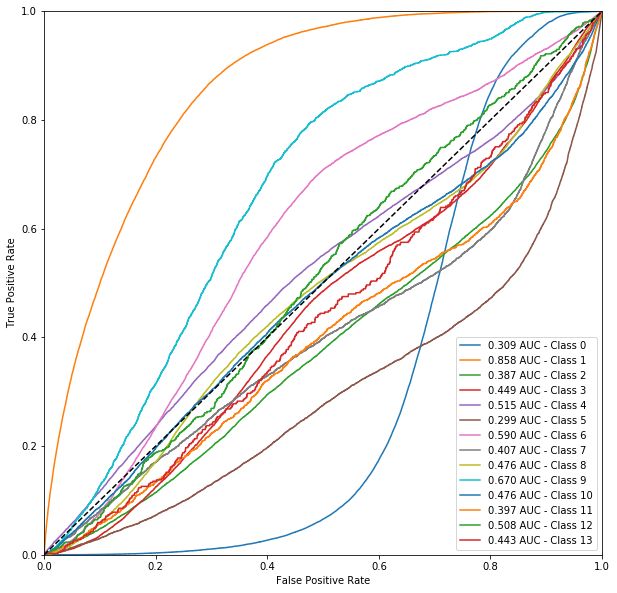

In [7]:
custom_classification_report(
    'Extra Trees',
    'model/experiment/output/extra_trees_basic_predict.p',
    'model/experiment/output/extra_trees_basic_predict_proba.p'
)

## Gradient Boosting

#### Confusion Matrix

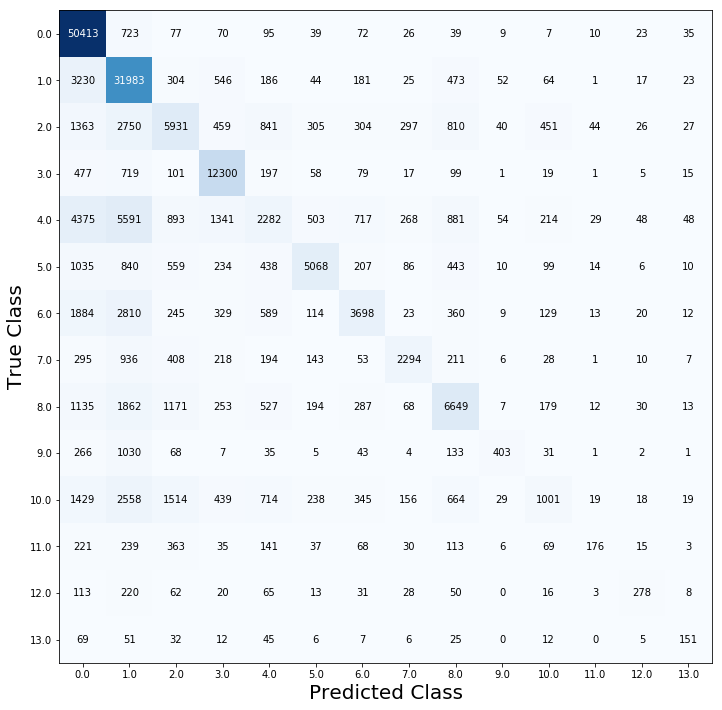

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.85     51638
         1.0       0.61      0.86      0.72     37129
         2.0       0.51      0.43      0.47     13648
         3.0       0.76      0.87      0.81     14088
         4.0       0.36      0.13      0.19     17244
         5.0       0.75      0.56      0.64      9049
         6.0       0.61      0.36      0.45     10235
         7.0       0.69      0.48      0.56      4804
         8.0       0.61      0.54      0.57     12387
         9.0       0.64      0.20      0.30      2029
        10.0       0.43      0.11      0.17      9143
        11.0       0.54      0.12      0.19      1516
        12.0       0.55      0.31      0.39       907
        13.0       0.41      0.36      0.38       421

   micro avg       0.67      0.67      0.67    184238
   macro avg       0.59      0.45      0.48    184238
weighted avg       0.63      0.67      0.62    184238



#### Accuracy Score

0.665590


#### Log Loss Score

1.130927


#### ROC Curves for All Classes

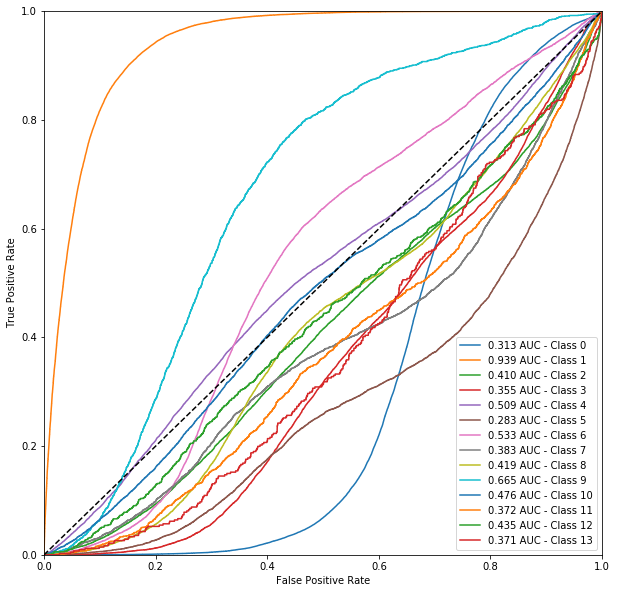

In [8]:
custom_classification_report(
    'Gradient Boosting',
    'model/experiment/output/gradient_boosting_basic_predict.p',
    'model/experiment/output/gradient_boosting_basic_predict_proba.p'
)

## LightGBM

#### Confusion Matrix

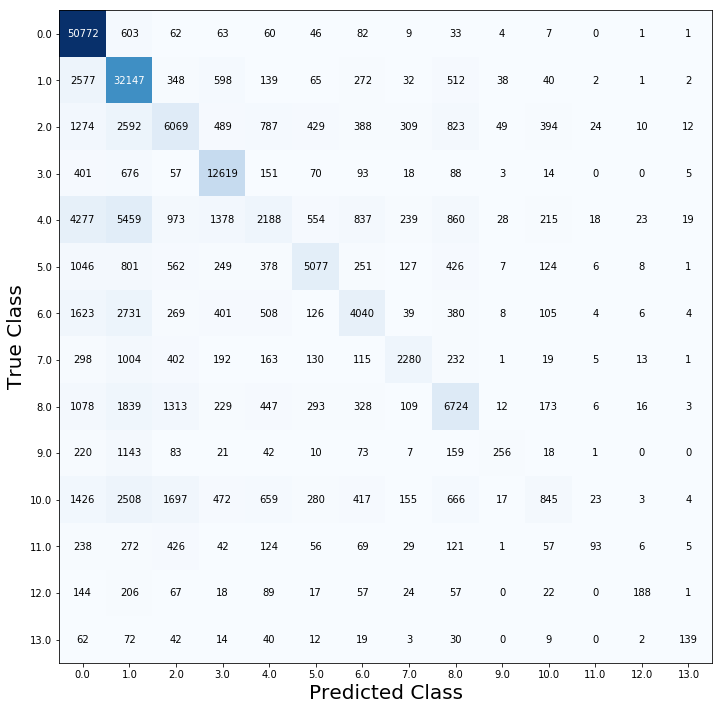

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87     51743
         1.0       0.62      0.87      0.72     36773
         2.0       0.49      0.44      0.47     13649
         3.0       0.75      0.89      0.81     14195
         4.0       0.38      0.13      0.19     17068
         5.0       0.71      0.56      0.63      9063
         6.0       0.57      0.39      0.47     10244
         7.0       0.67      0.47      0.55      4855
         8.0       0.61      0.53      0.57     12570
         9.0       0.60      0.13      0.21      2033
        10.0       0.41      0.09      0.15      9172
        11.0       0.51      0.06      0.11      1539
        12.0       0.68      0.21      0.32       890
        13.0       0.71      0.31      0.43       444

   micro avg       0.67      0.67      0.67    184238
   macro avg       0.61      0.43      0.46    184238
weighted avg       0.63      0.67      0.63    184238



#### Accuracy Score

0.669987


#### Log Loss Score

1.096336


#### ROC Curves for All Classes

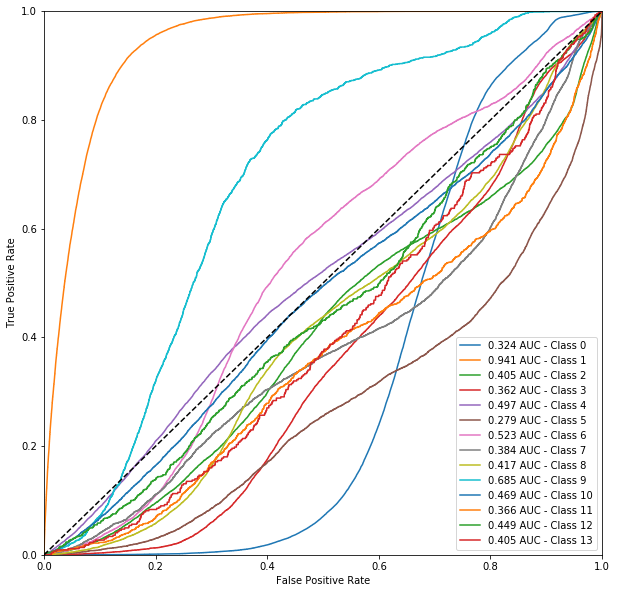

In [9]:
custom_classification_report(
    'LightGBM',
    'model/experiment/output/lightgbm_basic_predict.p',
    'model/experiment/output/lightgbm_basic_predict_proba.p'
)

## Random Forest

#### Confusion Matrix

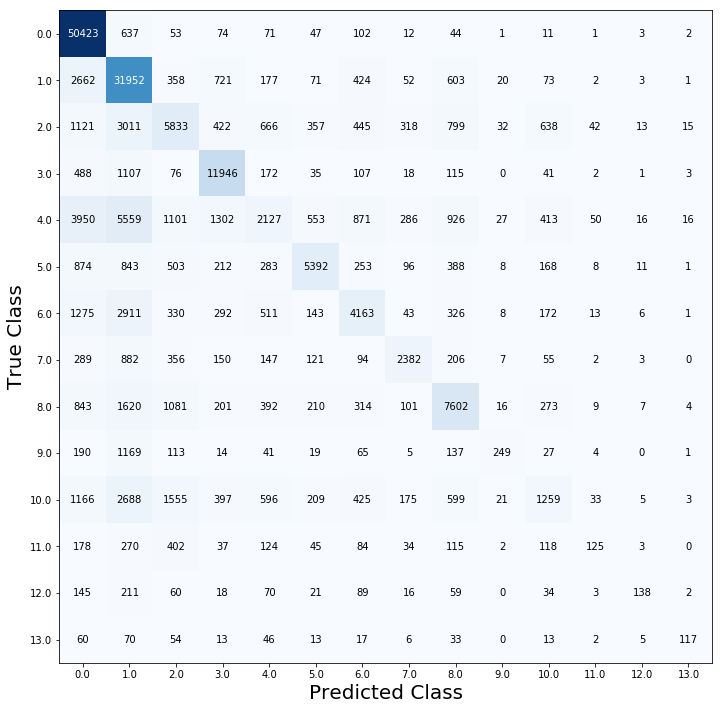

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88     51481
         1.0       0.60      0.86      0.71     37119
         2.0       0.49      0.43      0.46     13712
         3.0       0.76      0.85      0.80     14111
         4.0       0.39      0.12      0.19     17197
         5.0       0.75      0.60      0.66      9040
         6.0       0.56      0.41      0.47     10194
         7.0       0.67      0.51      0.58      4694
         8.0       0.64      0.60      0.62     12673
         9.0       0.64      0.12      0.21      2034
        10.0       0.38      0.14      0.20      9131
        11.0       0.42      0.08      0.14      1537
        12.0       0.64      0.16      0.26       866
        13.0       0.70      0.26      0.38       449

   micro avg       0.67      0.67      0.67    184238
   macro avg       0.60      0.44      0.47    184238
weighted avg       0.64      0.67      0.63    184238



#### Accuracy Score

0.671458


#### Log Loss Score

1.198687


#### ROC Curves for All Classes

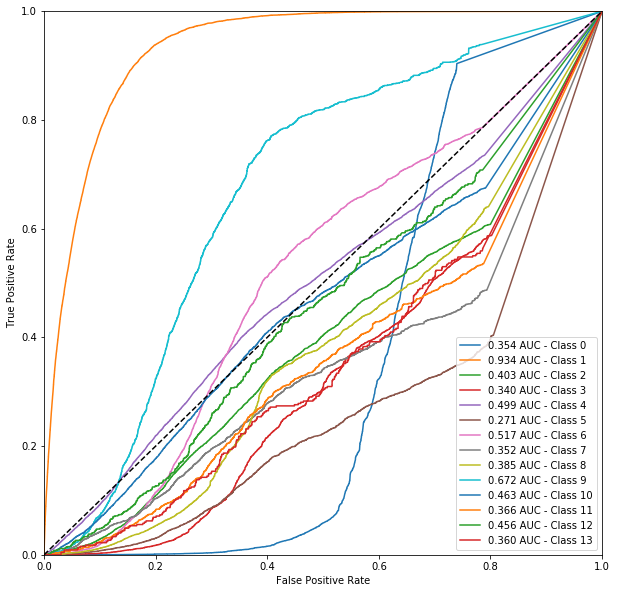

In [13]:
custom_classification_report(
    'Random Forest',
    'model/experiment/output/random_forest_basic_predict.p',
    'model/experiment/output/random_forest_basic_predict_proba.p'
)

## Nueral Network

#### Confusion Matrix

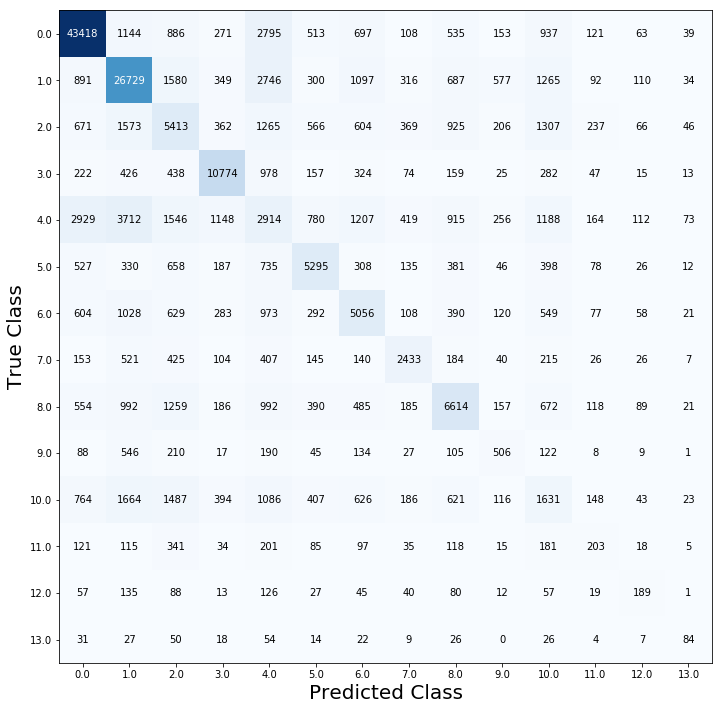

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85     51680
         1.0       0.69      0.73      0.71     36773
         2.0       0.36      0.40      0.38     13610
         3.0       0.76      0.77      0.77     13934
         4.0       0.19      0.17      0.18     17363
         5.0       0.59      0.58      0.58      9116
         6.0       0.47      0.50      0.48     10188
         7.0       0.55      0.50      0.52      4826
         8.0       0.56      0.52      0.54     12714
         9.0       0.23      0.25      0.24      2008
        10.0       0.18      0.18      0.18      9196
        11.0       0.15      0.13      0.14      1569
        12.0       0.23      0.21      0.22       889
        13.0       0.22      0.23      0.22       372

   micro avg       0.60      0.60      0.60    184238
   macro avg       0.43      0.43      0.43    184238
weighted avg       0.60      0.60      0.60    184238



#### Accuracy Score

0.603887


#### Log Loss Score

4.393729


#### ROC Curves for All Classes

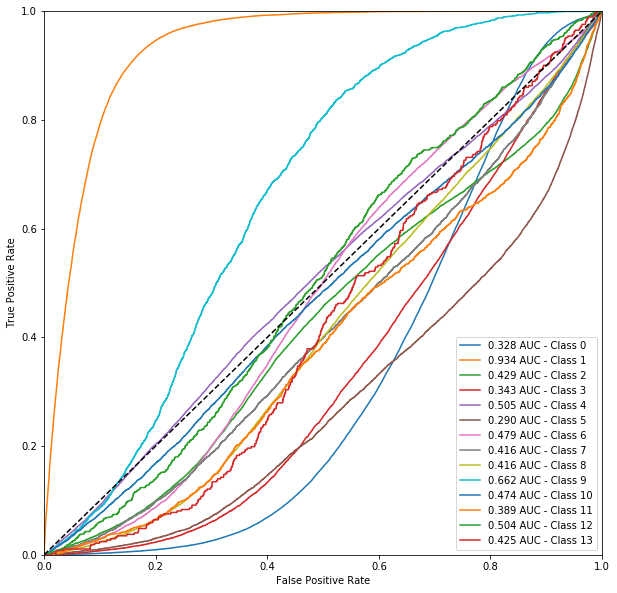

In [10]:
custom_classification_report(
    'Nueral Network',
    'model/experiment/output/neural_network_basic_predict.p',
    'model/experiment/output/neural_network_basic_predict_proba.p'
)

## XGBoost

#### Confusion Matrix

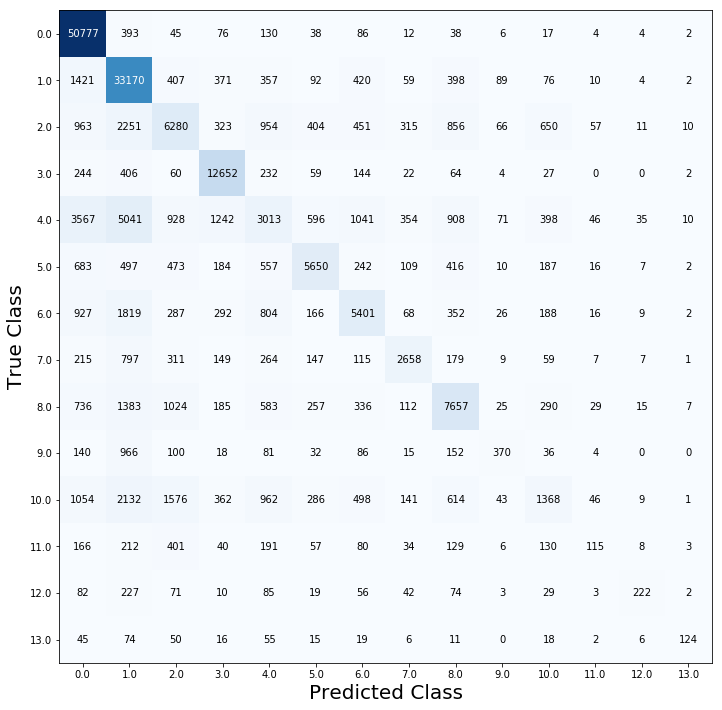

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90     51628
         1.0       0.67      0.90      0.77     36876
         2.0       0.52      0.46      0.49     13591
         3.0       0.79      0.91      0.85     13916
         4.0       0.36      0.17      0.24     17250
         5.0       0.72      0.63      0.67      9033
         6.0       0.60      0.52      0.56     10357
         7.0       0.67      0.54      0.60      4918
         8.0       0.65      0.61      0.63     12639
         9.0       0.51      0.18      0.27      2000
        10.0       0.39      0.15      0.22      9092
        11.0       0.32      0.07      0.12      1572
        12.0       0.66      0.24      0.35       925
        13.0       0.74      0.28      0.41       441

   micro avg       0.70      0.70      0.70    184238
   macro avg       0.60      0.48      0.50    184238
weighted avg       0.66      0.70      0.67    184238



#### Accuracy Score

0.702662


#### Log Loss Score

0.991649


#### ROC Curves for All Classes

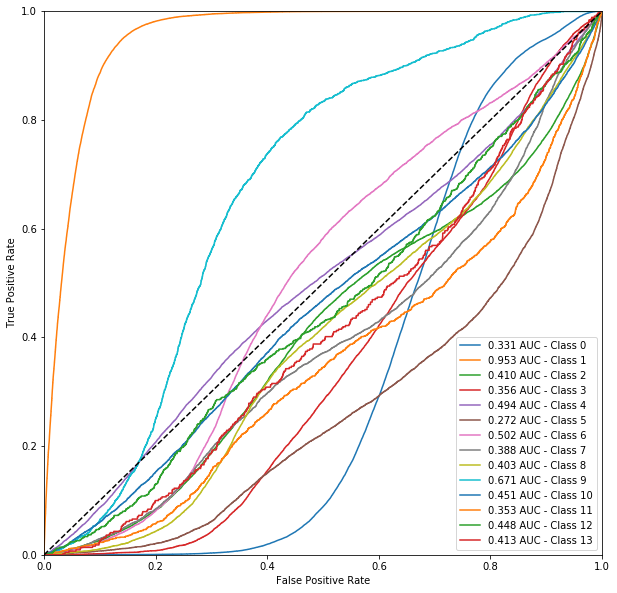

In [11]:
custom_classification_report(
    'XGBoost',
    'model/experiment/output/xgboost_basic_predict.p',
    'model/experiment/output/xgboost_basic_predict_proba.p'
)

# Final Model Performance

## XGBoost

#### Confusion Matrix

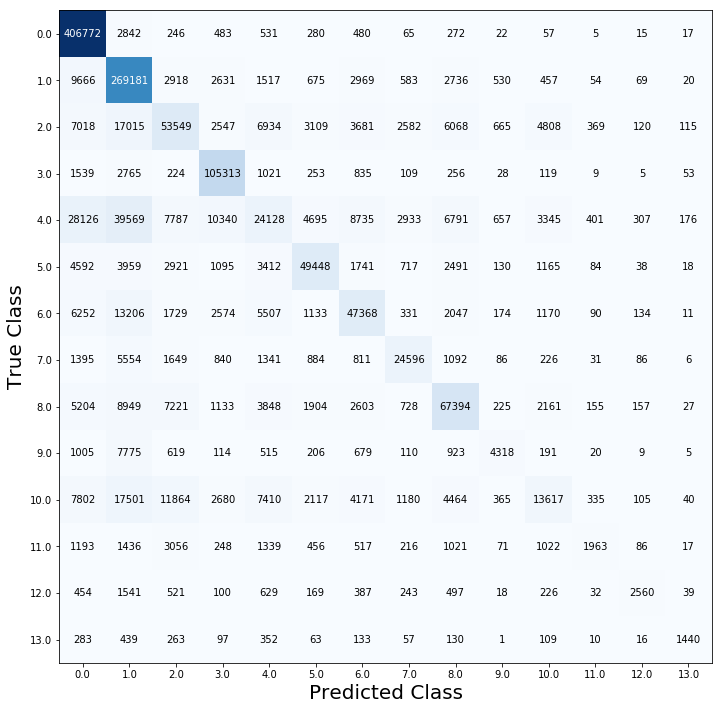

#### scikit-learn classification_report

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91    412087
         1.0       0.69      0.92      0.79    294006
         2.0       0.57      0.49      0.53    108580
         3.0       0.81      0.94      0.87    112529
         4.0       0.41      0.17      0.25    137990
         5.0       0.76      0.69      0.72     71811
         6.0       0.63      0.58      0.60     81726
         7.0       0.71      0.64      0.67     38597
         8.0       0.70      0.66      0.68    101709
         9.0       0.59      0.26      0.36     16489
        10.0       0.47      0.18      0.27     73651
        11.0       0.55      0.16      0.24     12641
        12.0       0.69      0.35      0.46      7416
        13.0       0.73      0.42      0.54      3393

   micro avg       0.73      0.73      0.73   1472625
   macro avg       0.65      0.53      0.56   1472625
weighted avg       0.70      0.73      0.70   1472625



#### Accuracy Score

0.727712


#### Log Loss Score

0.899270


#### ROC Curves for All Classes

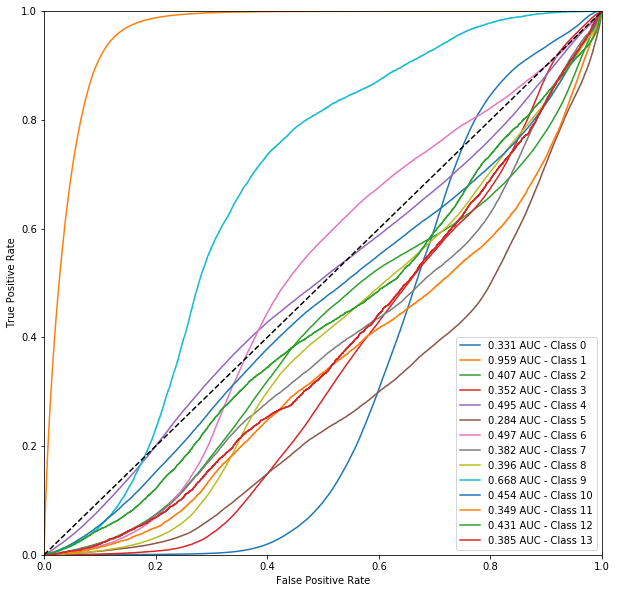

In [12]:
custom_classification_report(
    'XGBoost',
    'model/output/xgboost_model_predict.p',
    'model/output/xgboost_model_predict_proba.p'
)